In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
# Для выполнения задания используется один из df, который мы рассматривали ранее. 
df_hr = pd.read_csv('HRDataset_v14.csv')

In [6]:
# Выведем таблицу. При прочтении источников про тест Шапиро-Уитни я заметила, что его чаще рекомендуют использовать для малых выборок (до 50), но в целом допустимо и для выборок до 2000 значений. 
#Данный датасет соответствует этому критерию.
pd.options.display.max_columns = 999
df_hr

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


Shapiro-Wilk test for normality: ShapiroResult(statistic=0.6854951977729797, pvalue=1.1153204989966881e-23)


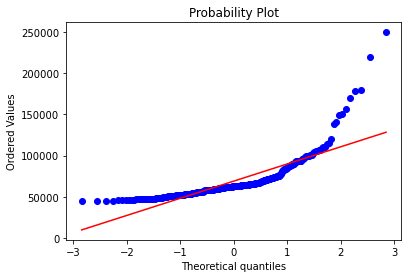

In [12]:
# При изучении источников я заметила, что вместе с тестом Шапиро-Уилка часто строят pp-plot или qq-plot, которые позволяют качественно оценить распределение.
data = df_hr['Salary']
stats.probplot(data, dist="norm", plot=plt)
print("Shapiro-Wilk test for normality:", stats.shapiro(data))
plt.show()
# p-value должно быть больше 0,05, чтобы гипотеза о происхождении данных из нормального распределения была принята.
# В данном случае мы видим, что полученное значение 2.0352736355522087e-14 < 0,05, значит гипотеза не принимается.
# О том, что распределение отличается от нормального свидетельствует и график, поскольку видны значительные отклонения от красной линии.

(array([197.,  65.,  32.,   7.,   2.,   3.,   3.,   0.,   1.,   1.]),
 array([ 45046. ,  65541.4,  86036.8, 106532.2, 127027.6, 147523. ,
        168018.4, 188513.8, 209009.2, 229504.6, 250000. ]),
 <BarContainer object of 10 artists>)

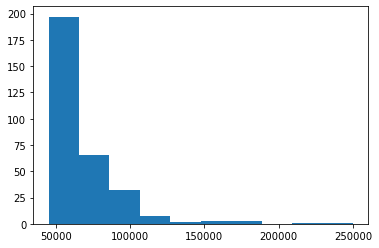

In [13]:
# Просто из интереса построим привычный для нас график. Интересно, что тут по форме распредление напоминает нормальное.
plt.hist(df_hr['Salary'])